In [1]:
##### DNN module

from keras.utils import to_categorical
from keras import backend as K
from keras.models import Model
from keras.applications import ResNet50
from keras.optimizers import Adagrad, RMSprop, Adam
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1, l2, l1_l2

Using TensorFlow backend.


In [2]:
#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
##### Common moldule

import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import time
from PIL import Image
from scipy.interpolate import RegularGridInterpolator
import pandas as pd

In [4]:
batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 5 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 100 # 訓練的 epochs 數量

In [5]:
pic_size = 120
fn_serial = '015'

In [6]:
l1_ratio = 1e-8

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(pic_size, pic_size, 3), kernel_regularizer=l1(l1_ratio)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=l1(l1_ratio)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l1(l1_ratio)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=l1(l1_ratio)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=l1(l1_ratio)))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 120, 120, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       36992     
_________________________________________________________________
activation_2 (Activation)    (None, 60, 60, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 64)       

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [9]:
augment_generator = ImageDataGenerator(
                                       rotation_range=20,
                                       rescale=1./255,
                                       #featurewise_center=True,
                                       #featurewise_std_normalization=True,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True,
                                       #data_format='channels_last'
                                      )

In [10]:
train_generator = augment_generator.flow_from_directory('database/image_data/sep_train',
                                                        target_size=(pic_size, pic_size),
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        )

Found 2323 images belonging to 5 classes.


In [11]:
valid_generator = augment_generator.flow_from_directory('database/image_data/sep_valid',
                                                        target_size=(pic_size, pic_size),
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        )

Found 500 images belonging to 5 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 120, 120, 3)
labels batch shape: (64, 5)


In [13]:
history = model.fit(train_generator,
                    steps_per_epoch=int(2323/batch_size), # 一個 epochs 要執行幾次 update，通常是資料量除以 batch size
                    epochs=epochs,
                    verbose=1,
                    validation_data=valid_generator,
                    validation_steps=int(500/batch_size))

Epoch 1/100
36/36 [==============================] - 11s 308ms/step - loss: 1.6847 - accuracy: 0.3320 - val_loss: 1.3484 - val_accuracy: 0.3259
Epoch 2/100
36/36 [==============================] - 13s 351ms/step - loss: 1.2647 - accuracy: 0.4727 - val_loss: 1.2180 - val_accuracy: 0.4404
Epoch 3/100
36/36 [==============================] - 11s 301ms/step - loss: 1.1853 - accuracy: 0.5032 - val_loss: 1.0949 - val_accuracy: 0.5138
Epoch 4/100
36/36 [==============================] - 10s 275ms/step - loss: 1.0904 - accuracy: 0.5750 - val_loss: 0.9728 - val_accuracy: 0.5023
Epoch 5/100
36/36 [==============================] - 10s 270ms/step - loss: 1.0644 - accuracy: 0.5843 - val_loss: 1.1306 - val_accuracy: 0.5826
Epoch 6/100
36/36 [==============================] - 10s 264ms/step - loss: 1.0139 - accuracy: 0.5989 - val_loss: 1.0586 - val_accuracy: 0.6170
Epoch 7/100
36/36 [==============================] - 9s 259ms/step - loss: 0.9911 - accuracy: 0.6144 - val_loss: 1.1137 - val_accuracy: 

Epoch 58/100
36/36 [==============================] - 11s 317ms/step - loss: 0.4300 - accuracy: 0.8377 - val_loss: 1.0623 - val_accuracy: 0.6330
Epoch 59/100
36/36 [==============================] - 10s 272ms/step - loss: 0.3989 - accuracy: 0.8513 - val_loss: 0.8031 - val_accuracy: 0.7133
Epoch 60/100
36/36 [==============================] - 10s 284ms/step - loss: 0.4191 - accuracy: 0.8358 - val_loss: 0.6521 - val_accuracy: 0.7615
Epoch 61/100
36/36 [==============================] - 10s 264ms/step - loss: 0.3737 - accuracy: 0.8519 - val_loss: 1.3113 - val_accuracy: 0.6583
Epoch 62/100
36/36 [==============================] - 9s 255ms/step - loss: 0.3974 - accuracy: 0.8499 - val_loss: 1.0435 - val_accuracy: 0.7041
Epoch 63/100
36/36 [==============================] - 10s 274ms/step - loss: 0.3637 - accuracy: 0.8589 - val_loss: 0.7269 - val_accuracy: 0.7202
Epoch 64/100
36/36 [==============================] - 9s 256ms/step - loss: 0.3510 - accuracy: 0.8583 - val_loss: 1.3893 - val_accu

In [14]:
model.save(f'model/STD_datagen_0101_{fn_serial}-100eps-2.h5')

In [15]:
##### Test on unknown sample

In [16]:
path_unknown = glob.glob('database/image_data/test/*')
path_unknown[:5]

['database/image_data/test\\0028624c49b3e0610ff9f1d111f5d532.jpg',
 'database/image_data/test\\002c30700185b7971369258b438070d5.jpg',
 'database/image_data/test\\00852f4f666acecd0c0d140365b42efd.jpg',
 'database/image_data/test\\00c08828fce04e360c732cac01edad9e.jpg',
 'database/image_data/test\\00d366e7877b6a78b104b57d67b60e6b.jpg']

In [17]:
def resampleRGI3d(input_mx, resize_to, dtype='float32'):
    # Ref: 10 3-A-7
    # Ver. 2.1
    # input_mx : numpy array, the original target matrix
    # resize_to: list or tuple with 3 int inside
    a, b, c = np.shape(input_mx)
    p, q, r = resize_to
    z_grid = np.linspace(0, p - 1, a)
    y_grid = np.linspace(0, q - 1, b)
    x_grid = np.linspace(0, r - 1, c)
    RGI = RegularGridInterpolator((z_grid, y_grid, x_grid), input_mx)
    z_grid_t2 = np.arange(p)
    y_grid_t2 = np.arange(q)
    x_grid_t2 = np.arange(r)
    meshgrid_para = np.meshgrid(z_grid_t2, y_grid_t2, x_grid_t2)
    RGI_mesh_mx = RGI((meshgrid_para[0], meshgrid_para[1], meshgrid_para[2]))
    RGI_mx = np.transpose(RGI_mesh_mx, axes=[1, 0, 2]).astype(dtype)
    return RGI_mx

def happy_time(start,stop):
    process_time = round(stop - start)
    ss = process_time % 60
    mm = process_time // 60 % 60
    hh = process_time // 3600
    duration = "Process time == {}s == {}H {}m {}s".format(process_time,hh,mm,ss)
    return duration

In [18]:

id_li = []
flower_class = []
loop_start = time.time()

for j in range(len(path_unknown)):
    serial = os.path.basename(path_unknown[j])[:-4]
    temp_pic = np.asarray(Image.open(path_unknown[j]))
    temp_pic = resampleRGI3d(temp_pic, (pic_size, pic_size, 3))
    temp_shape = np.shape(temp_pic)
    temp_pic = np.expand_dims(temp_pic, axis = 0)
    pred = model.predict(temp_pic)[0]
    id_li.append(serial)
    flower_class.append(list(pred).index(max(pred)))
    if (j+1) % 200 == 0:
        print(j+1, 'files done.', happy_time(loop_start, time.time()))

200 files done. Process time == 3s == 0H 0m 3s
400 files done. Process time == 6s == 0H 0m 6s
600 files done. Process time == 8s == 0H 0m 8s
800 files done. Process time == 11s == 0H 0m 11s
1000 files done. Process time == 14s == 0H 0m 14s
1200 files done. Process time == 17s == 0H 0m 17s
1400 files done. Process time == 20s == 0H 0m 20s
1600 files done. Process time == 23s == 0H 0m 23s
1800 files done. Process time == 26s == 0H 0m 26s
2000 files done. Process time == 28s == 0H 0m 28s


In [19]:
pred_result_df = pd.DataFrame(columns=['id', 'flower_class'])
pred_result_df['id'] = id_li
pred_result_df['flower_class'] = flower_class
pred_result_df

,id,flower_class
0,0028624c49b3e0610ff9f1d111f5d532,2
1,002c30700185b7971369258b438070d5,3
2,00852f4f666acecd0c0d140365b42efd,2
3,00c08828fce04e360c732cac01edad9e,4
4,00d366e7877b6a78b104b57d67b60e6b,3
...,...,...
1995,ff7eac29b6d7a33fbd8009677c3e9c58,3
1996,ffbc32a7b67dfe72b8d35d4b1b35fd6c,1
1997,ffea1f275c05accb0a6bfd1203620c7e,0
1998,ffeb2a1cf53464b6af937ab8af0c2946,3


In [20]:
pred_result_df['flower_class'].value_counts().sort_index()


#50eps
#0    490
#1    139
#2    264
#3    696
#4    411
#Name: flower_class, dtype: int64

0    305
1    384
2    386
3    598
4    327
Name: flower_class, dtype: int64

In [21]:
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

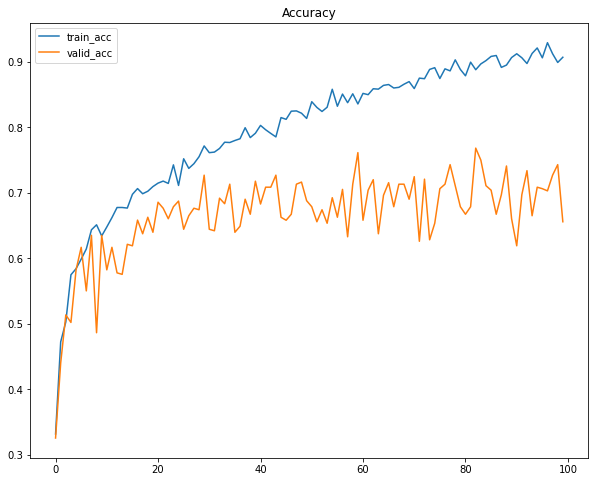

In [22]:
plt.figure(figsize=(10,8))
plt.title('Accuracy')
plt.plot(train_acc, label = 'train_acc')
plt.plot(valid_acc, label = 'valid_acc')
plt.legend()
plt.show()

In [23]:
pred_result_df.to_csv(f'model/pred_result_STD_datagen_0101_{fn_serial}-100eps-2.csv', index=False)

In [22]:
#####
#####
#####

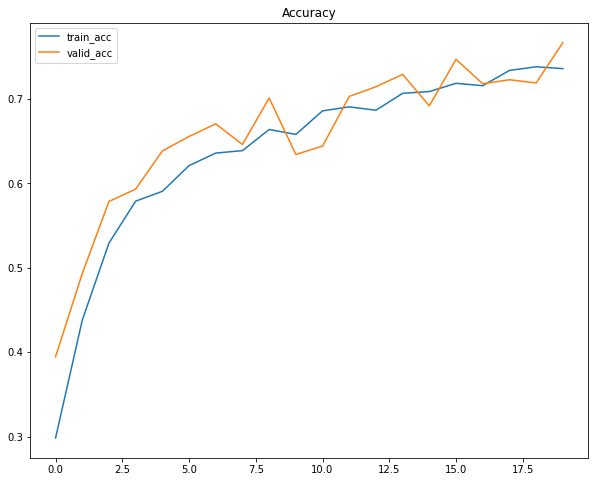

In [30]:
plt.figure(figsize=(10,8))
plt.title('Accuracy')
plt.plot(train_acc, label = 'train_acc')
plt.plot(valid_acc, label = 'valid_acc')
plt.legend()
plt.show()

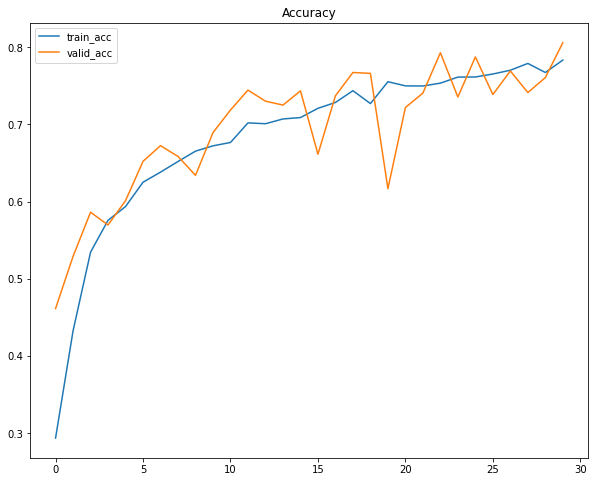

In [24]:
plt.figure(figsize=(10,8))
plt.title('Accuracy')
plt.plot(train_acc, label = 'train_acc')
plt.plot(valid_acc, label = 'valid_acc')
plt.legend()
plt.show()

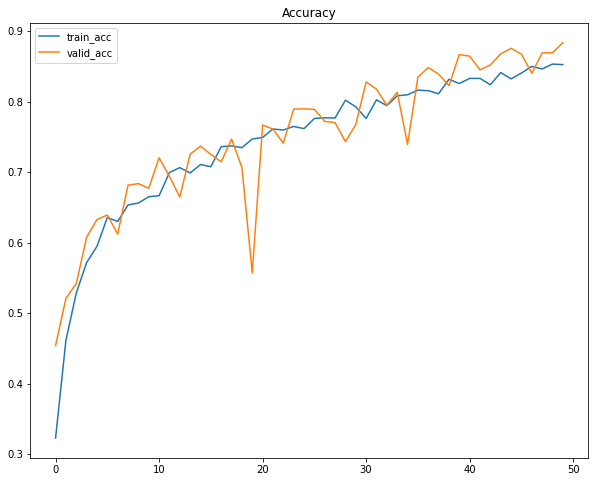

In [24]:
plt.figure(figsize=(10,8))
plt.title('Accuracy')
plt.plot(train_acc, label = 'train_acc')
plt.plot(valid_acc, label = 'valid_acc')
plt.legend()
plt.show()

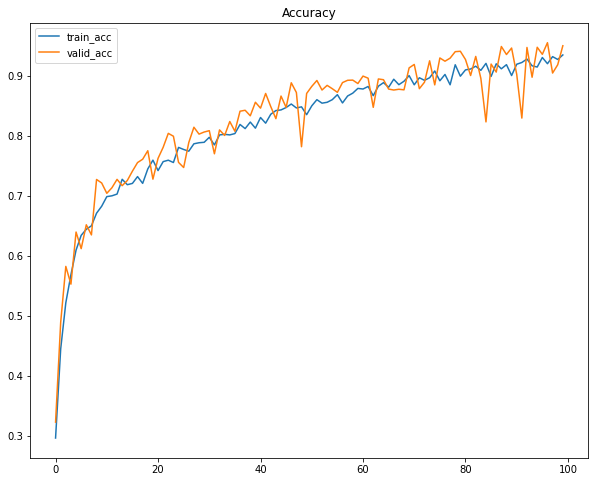

In [22]:
plt.figure(figsize=(10,8))
plt.title('Accuracy')
plt.plot(train_acc, label = 'train_acc')
plt.plot(valid_acc, label = 'valid_acc')
plt.legend()
plt.show()

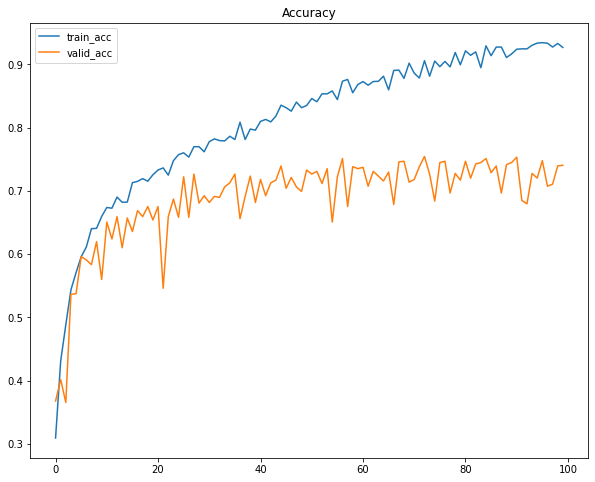

In [24]:
plt.figure(figsize=(10,8))
plt.title('Accuracy')
plt.plot(train_acc, label = 'train_acc')
plt.plot(valid_acc, label = 'valid_acc')
plt.legend()
plt.show()